### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from MyMLP.MyMLP import MyMLP

In [2]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

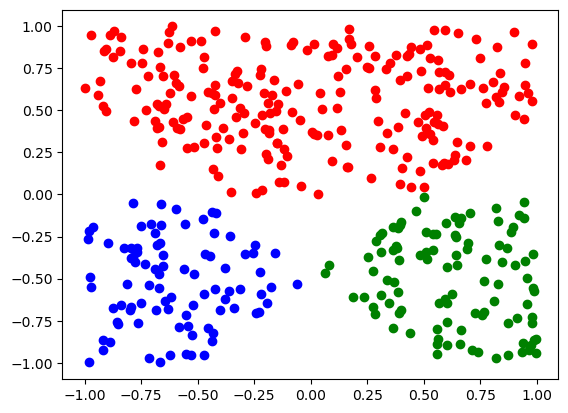

<Figure size 640x480 with 0 Axes>

In [3]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [4]:
my_mlp = MyMLP([2,3])

In [8]:
# Train the model on the test case
my_mlp.train(X , Y, is_classification=True, iteration_count=100000, alpha=0.01)

# Convert X to a list of lists
# Display the predicted outputs of the model
predictions =[my_mlp.predict(x, is_classification=True) for x in X]
print(predictions)
accuracy = my_mlp.calculate_accuracy(X,Y)
print(accuracy)
# Calculate the loss on the test case

#print("Loss:", my_mlp.loss)


[[0.5981823640912445, 0.19161328798927166, 0.14223549378984784], [-0.22160695530913416, 0.8842167247800028, 0.2121099918652695], [0.11083356804407421, 0.9103461237875871, -0.2115684297541791], [0.0601968057888501, 0.6395874460821267, 0.3600402827386224], [0.41944835087570276, 0.5132987553166656, 0.12381413702395964], [0.21101234389388046, 0.744322497932882, 0.08123602300764136], [-0.05167012364363841, 0.9322732105601782, -0.15323921446312622], [-0.4044350622774255, 0.9382892495929106, 0.18595235129658524], [0.292248556585832, 0.8085715633717416, -0.11863255166917423], [-0.3105946027837732, 0.8718590841223727, 0.33532870233871087], [0.6757611970782592, 0.13856165754588157, 0.05075069418123051], [-0.21091229648084125, 0.9228502658154265, 0.05482741751686504], [0.564073975481692, 0.195361321384674, 0.18955152784658294], [0.17460629709702, 0.8338880152848738, -0.049414412557103424], [0.47862283782654536, 0.5525514256762106, 0.01204327054577421], [0.15084764060089875, 0.8430118294047447, -0

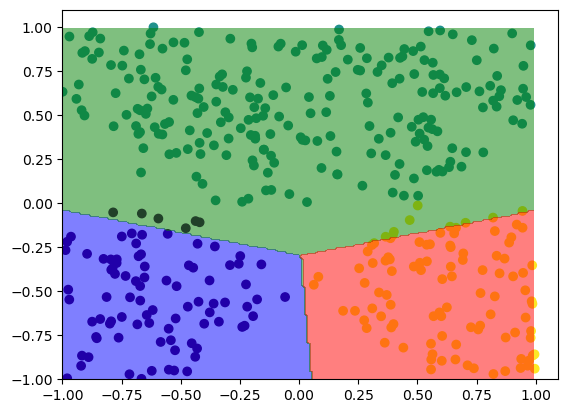

In [12]:
x_min, x_max = -1., 1.
y_min, y_max = -1., 1.
step = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
gridpoints = np.c_[xx.ravel(), yy.ravel()]

output_ptr =  [my_mlp.predict(x, is_classification=True) for x in gridpoints]
output_ptr = np.array(output_ptr)

plt.scatter(X[:, 0], X[:, 1], c=np.argmax(Y, axis=1))

contour = np.argmax(output_ptr, axis=1).reshape(xx.shape)
plt.contourf(xx, yy, contour, levels=[-np.inf, 0.5, 1.5, np.inf], colors=['blue', 'green', 'red'],
             alpha=0.5)

plt.show()

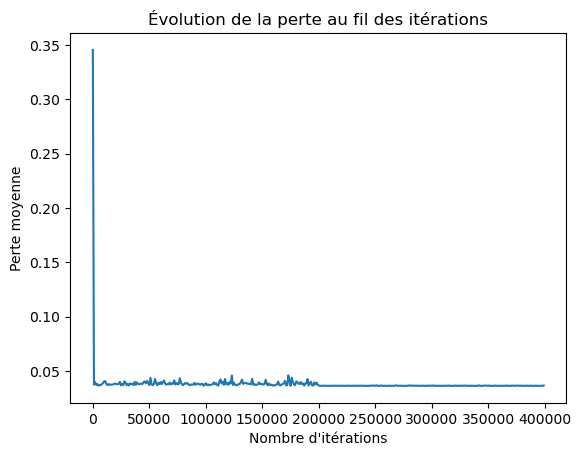

In [14]:
tab =(my_mlp.loss)
plt.plot(range(0, len(tab) * 1000, 1000), tab)  # Utilisez len(tab) pour déterminer la longueur correcte de l'axe x
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Perte moyenne')
plt.title('Évolution de la perte au fil des itérations')
plt.show()
#title